- Rania Raouraou
- Groupe : Ai 101

- Le jeu de données Stroke Prediction Dataset, disponible sur Kaggle, contient des informations démographiques et médicales sur des patients, avec pour objectif de prédire si un individu est susceptible de faire un AVC (Accident Vasculaire Cérébral). La variable cible (target) de ce jeu de données est la colonne stroke, qui indique si la personne a eu un AVC (1) ou non (0).

- L’explication des colonnes du dataset * **Stroke Prediction Dataset** :

1. **id** : Identifiant unique du patient.
2. **gender** : Sexe du patient (Male, Female, Other).
3. **age** : Âge du patient.
4. **hypertension** : Indique si le patient souffre d’hypertension (0 = non, 1 = oui).
5. **heart\_disease** : Indique si le patient souffre d’une maladie cardiaque (0 = non, 1 = oui).
6. **ever\_married** : Indique si le patient a déjà été marié (Yes ou No).
7. **work\_type** : Type d’emploi du patient (Private, Self-employed, Govt\_job, Children, Never\_worked).
8. **Residence\_type** : Type de résidence (Urban ou Rural).
9. **avg\_glucose\_level** : Niveau moyen de glucose dans le sang.
10. **bmi** : Indice de masse corporelle.
11. **smoking\_status** : Statut tabagique du patient (formerly smoked, never smoked, smokes, Unknown).
12. **stroke** : Variable cible – indique si le patient a eu un AVC (1) ou non (0).


- Source :
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## 1. Importation des bibliothèques nécessaires :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 2. Initial Data Exploration

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 3. Handle Missing Values

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_15024\1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


## 4. Handle duplicates

In [8]:
df.duplicated().sum()

0

## 5. Visualisation 

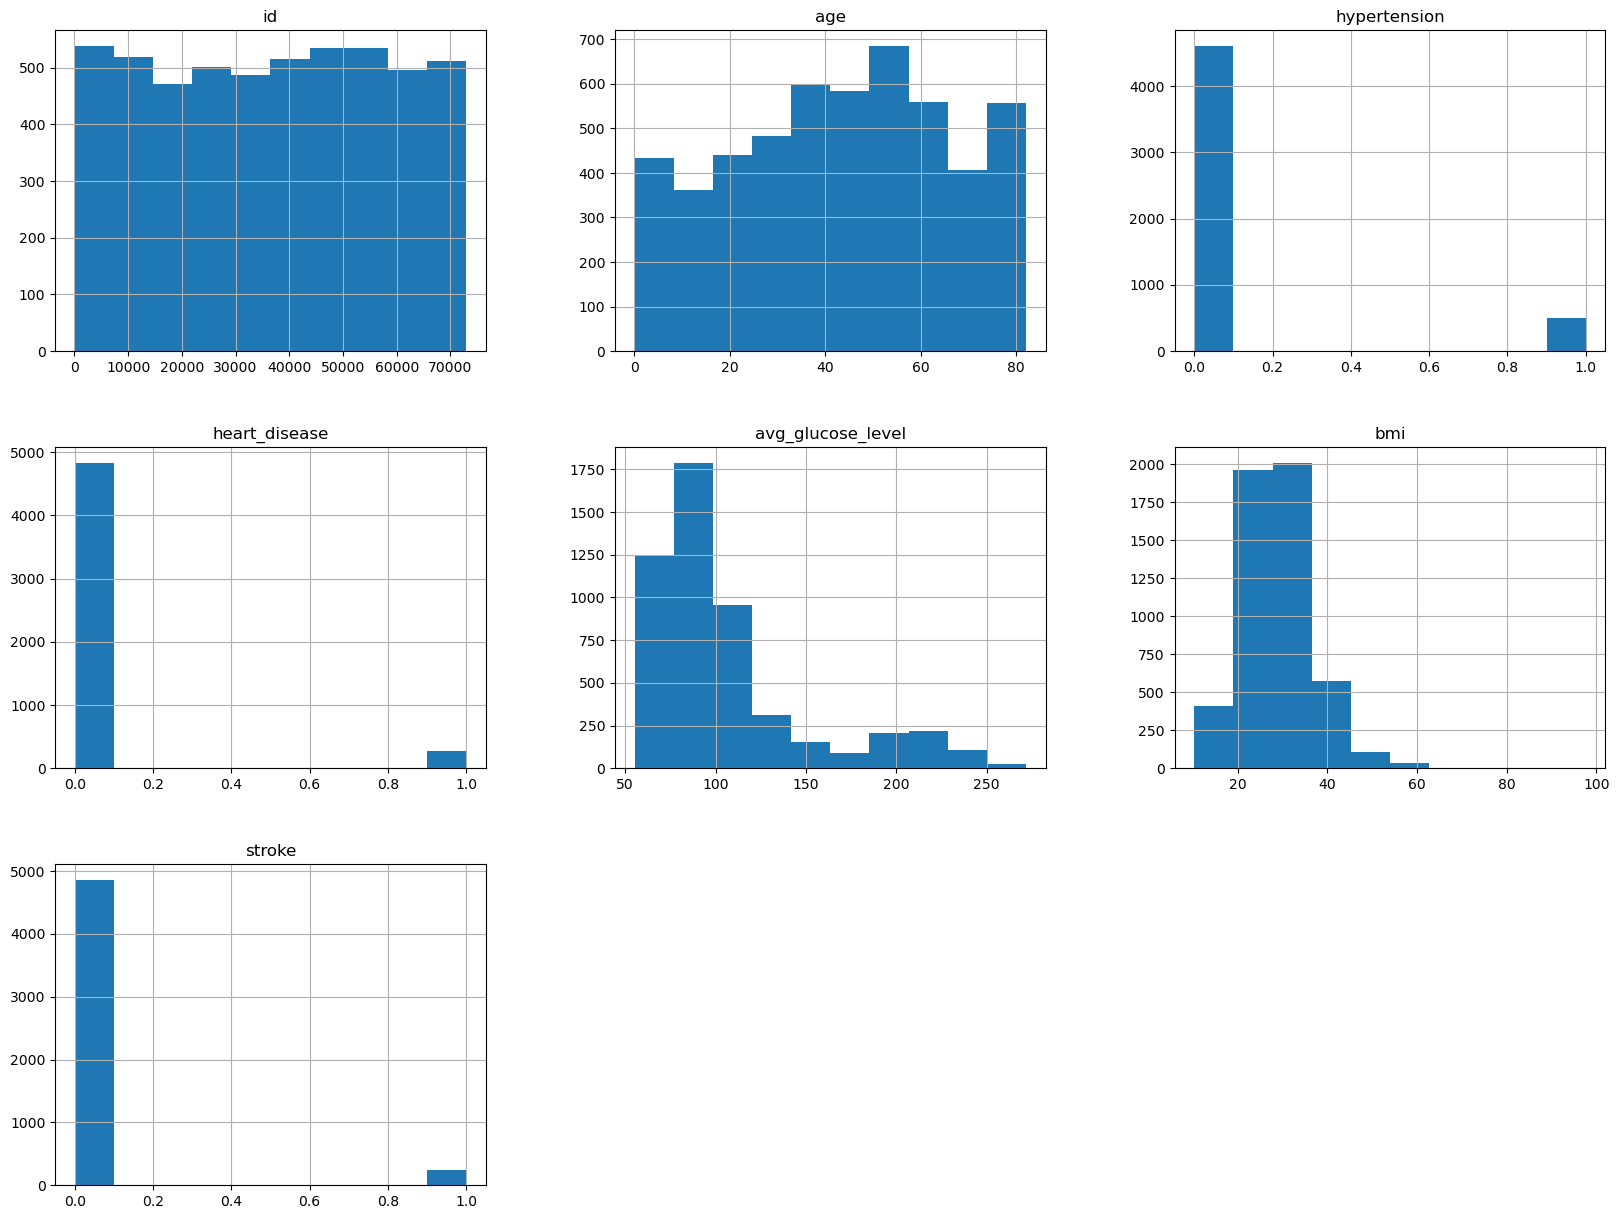

In [9]:
df.hist(figsize=(20, 15))
plt.show()

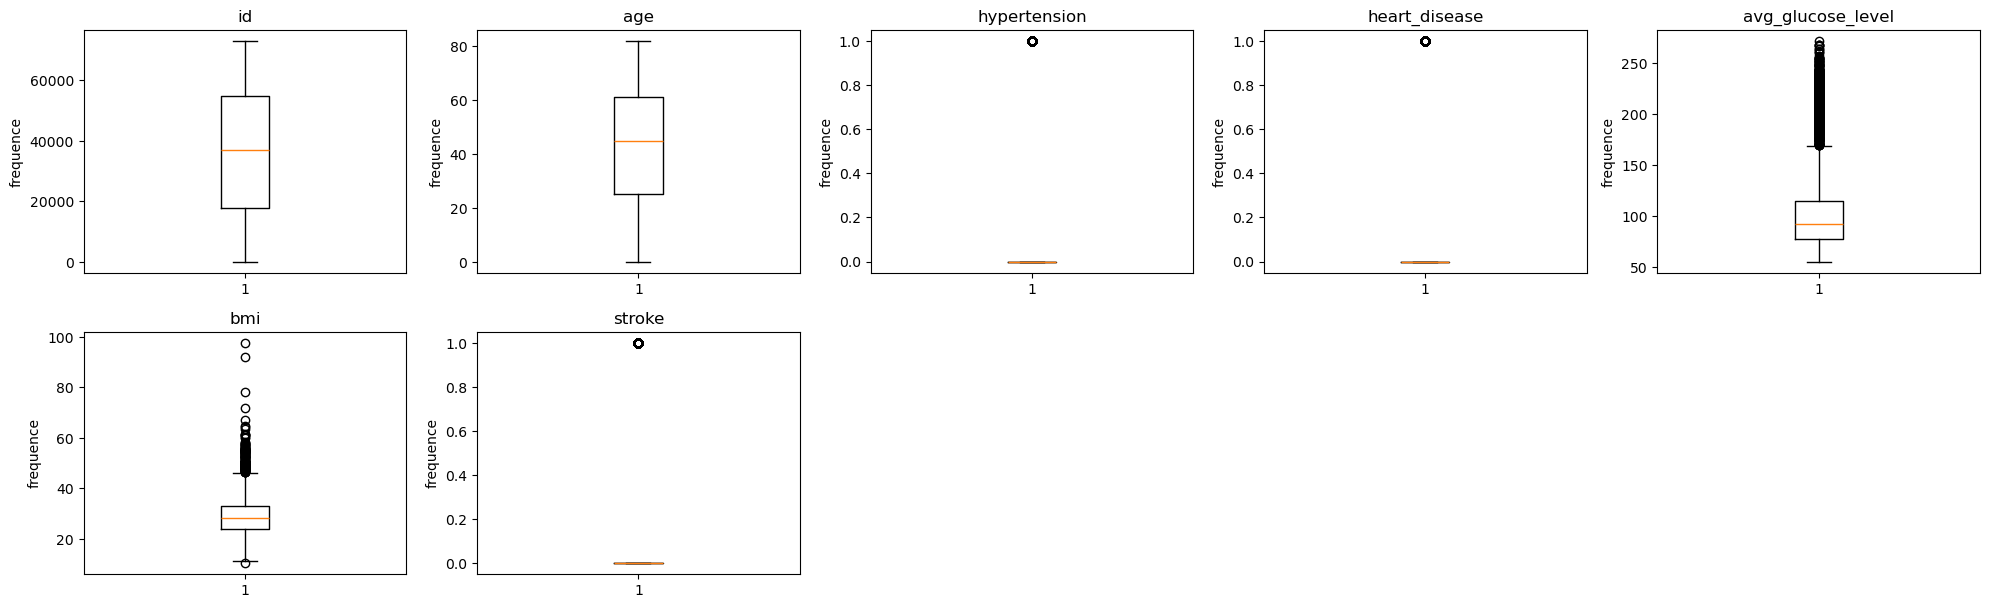

In [10]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(np.number).columns):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel('frequence')
plt.tight_layout()
plt.show()


## 6. Handle Outliers

In [11]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    # print(f"Intervalle accepté pour {column}: [{lower_limit}, {upper_limit}]")
    print(f"Outliers détectés {column} : {len(outliers)}")

    
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

def detect_all_outliers(df):
    for column in df.columns:  
        if df[column].dtype in ['int64', 'float64']:
            detect_outliers(df, column)

In [12]:
detect_all_outliers(df)

Outliers détectés id : 0
Outliers détectés age : 0
Outliers détectés hypertension : 498
Outliers détectés heart_disease : 276
Outliers détectés avg_glucose_level : 627
Outliers détectés bmi : 126
Outliers détectés stroke : 249


In [13]:
df = remove_outliers(df, 'avg_glucose_level')
df = remove_outliers(df, 'bmi')

## **7. Encodage** :

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df[['gender']])
df['ever_married'] = encoder.fit_transform(df[['ever_married']])
df['work_type'] = encoder.fit_transform(df[['work_type']])
df['Residence_type'] = encoder.fit_transform(df[['Residence_type']])
df['smoking_status'] = encoder.fit_transform(df[['smoking_status']])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

- **Supression des colonnes inutiles** :

In [15]:
df = df.drop(columns=['id'])

## Partie Machine Learning :

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

- **Division des données** :

In [17]:
x = df.drop(columns=['stroke'])
y = df['stroke']

- **Gestion du déséquilibre des classes** :

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x, y = ros.fit_resample(x, y)

- **Normalisation** :

In [19]:
scaler = StandardScaler()
scaler.fit_transform(x,y)

array([[ 1.22208813,  1.16187727, -0.41642671, ...,  0.62253418,
         0.74828921,  0.57404191],
       [ 1.22208813,  0.90133616,  2.40138292, ..., -0.90808655,
        -0.14041923,  0.57404191],
       [-0.81746481,  0.68421858, -0.41642671, ...,  0.12998444,
        -0.94199939,  0.57404191],
       ...,
       [-0.81746481,  1.20530079, -0.41642671, ..., -0.40143956,
        -1.97011307,  0.57404191],
       [-0.81746481,  0.81448913,  2.40138292, ..., -0.71414242,
        -0.88972242, -0.38492971],
       [ 1.22208813, -0.09740475,  2.40138292, ...,  0.88910056,
         2.49085477, -0.38492971]])

## **feature_selection** :

- **Pour sélectionner les meilleures variables (features)**:

In [20]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(score_func=f_classif, k=8)
# x_selected = selector.fit_transform(x_res, y)

# selected_features = selector.get_support(indices=True)
# print(df.columns[selected_features])


<Axes: >

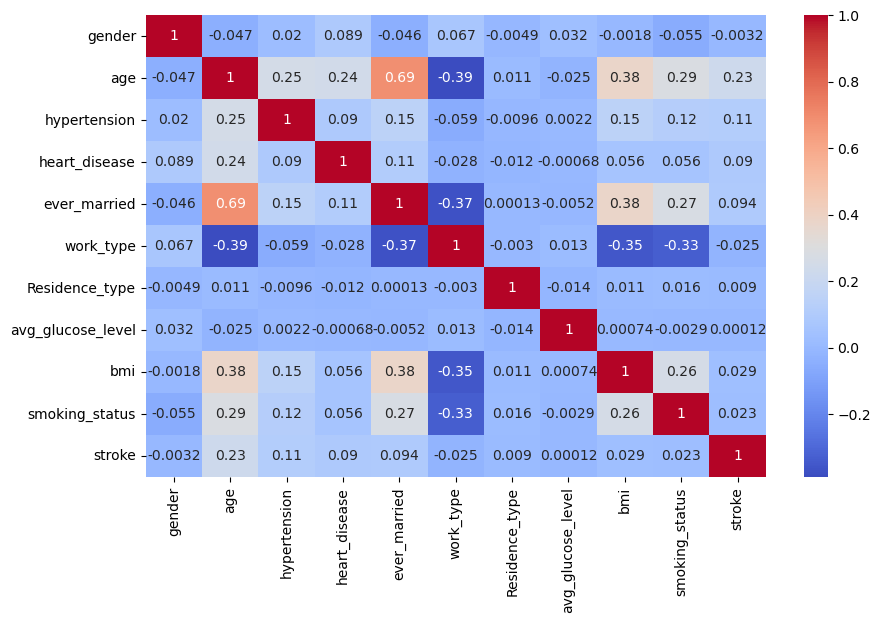

In [21]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')


- **PCA** :

In [22]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# x_pca = pca.fit_transform(x_res)


- **Division des données** :

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

 ## **Regression Logistic** :

Accuracy: 0.77
F1 Score: 0.77
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       838
           1       0.75      0.80      0.78       850

    accuracy                           0.77      1688
   macro avg       0.77      0.77      0.77      1688
weighted avg       0.77      0.77      0.77      1688



c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


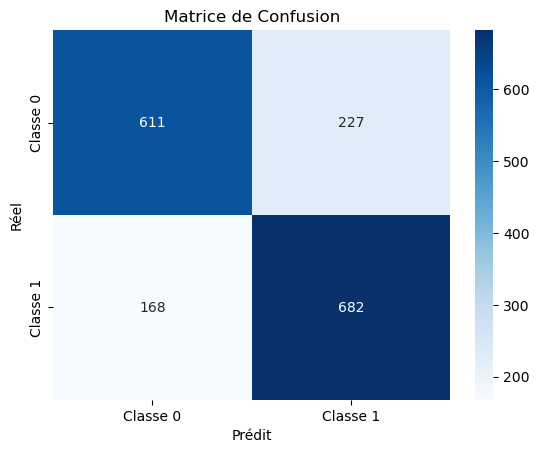

In [24]:
#  Entraînement du modèle
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Évaluation du modèle

# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")


print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()



- **Validation croisée** :

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.768
Average accuracy: 0.768


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

## **Courbe ROC et AUC** :

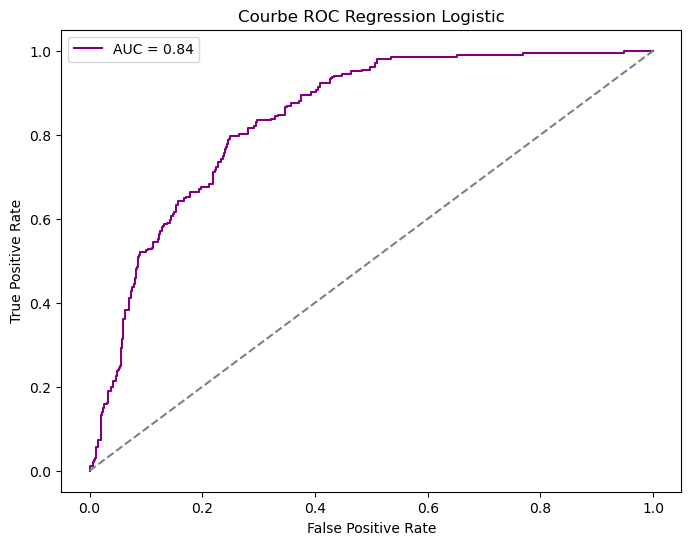

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC
y_scores = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc1 = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Regression Logistic')
plt.legend()
plt.show()



## **KNN** : 

Accuracy: 0.93
F1 Score: 0.92
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       838
           1       0.87      1.00      0.93       850

    accuracy                           0.93      1688
   macro avg       0.94      0.92      0.92      1688
weighted avg       0.93      0.93      0.92      1688



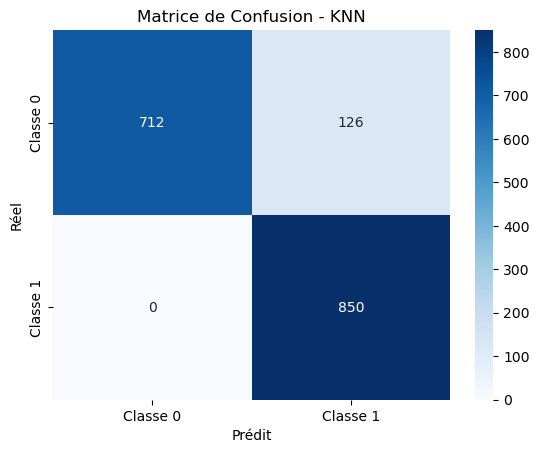

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"F1 Score: {f1_knn:.2f}")

print(classification_report(y_test, y_pred_knn))


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - KNN')
plt.show()


- **Validation croisée** :

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.9053333333333334
Average accuracy: 0.9053333333333334


## **Courbe ROC et AUC** :

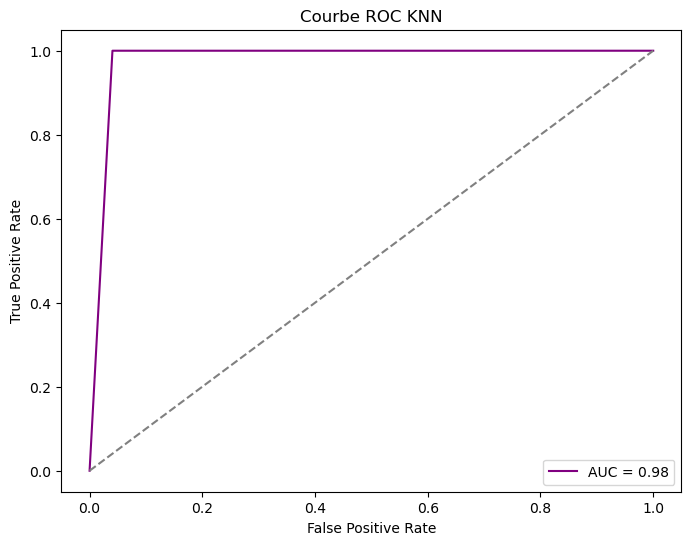

In [29]:
# Calcul de la courbe ROC
y_scores1 = knn.predict_proba(x_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='purple', label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC KNN')
plt.legend()
plt.show()


## **Random Forest** :

Accuracy: 1.00
F1 Score: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       838
           1       0.99      1.00      1.00       850

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688



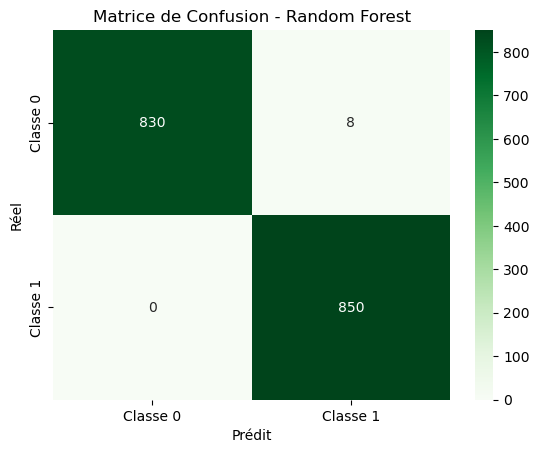

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest n’a pas vraiment besoin de StandardScaler, mais on peux la garder si on veut un pipeline uniforme

# Initialisation et entraînement du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Prédiction
y_pred_rf = rf.predict(x_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# F1-score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score: {f1_rf:.2f}")

# Rapport de classification
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Random Forest')
plt.show()


- **Validation croisée** :

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.9928888888888888
Average accuracy: 0.9928888888888888


## **Courbe ROC et AUC** :

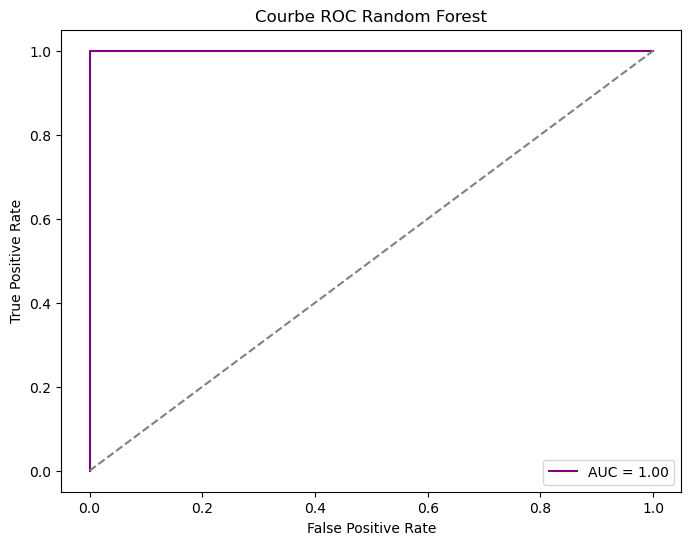

In [32]:
# Calcul de la courbe ROC
y_scores2 = rf.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='purple', label=f'AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Random Forest')
plt.legend()
plt.show()


- **Importance des Caractéristiques dans Random Forest** :

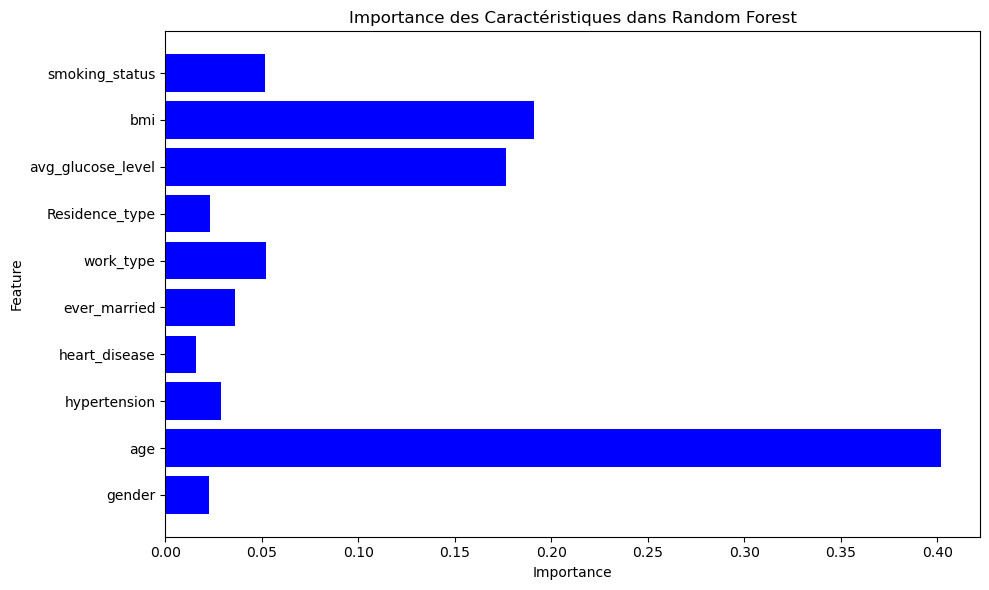

In [33]:
# Affichage de l'importance des caractéristiques
importances = rf.feature_importances_
features = x.columns  

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='b')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des Caractéristiques dans Random Forest")
plt.tight_layout()
plt.show()


- **Son trier par ordre d'importance** :

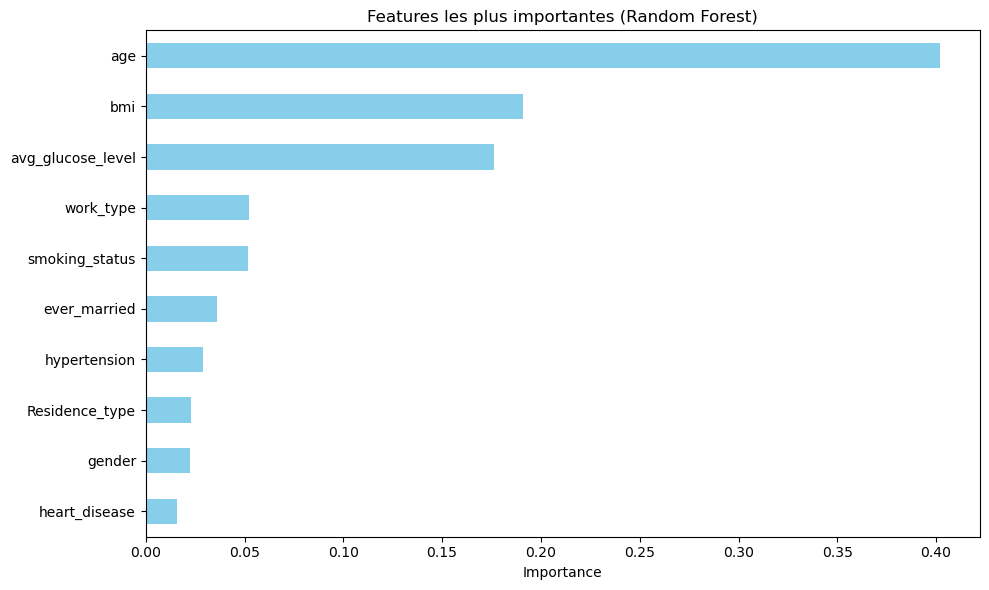

In [34]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Importance")
plt.title("Features les plus importantes (Random Forest)")
plt.tight_layout()
plt.show()


## **Decision Trees** 

Accuracy: 0.97
F1 Score: 0.96
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       838
           1       0.94      1.00      0.97       850

    accuracy                           0.97      1688
   macro avg       0.97      0.96      0.96      1688
weighted avg       0.97      0.97      0.96      1688



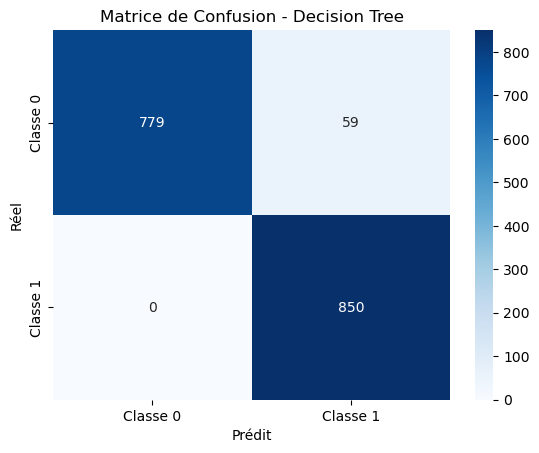

In [35]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(criterion="gini", max_depth=14, random_state=42)
dt.fit(x_train, y_train)


y_pred_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")


f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 Score: {f1_dt:.2f}")


print(classification_report(y_test, y_pred_dt))


conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Decision Tree')
plt.show()


- **Validation croisée** :

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.9605925925925926
Average accuracy: 0.9605925925925926


## **Visualisation de l'Arbre de Décision** :

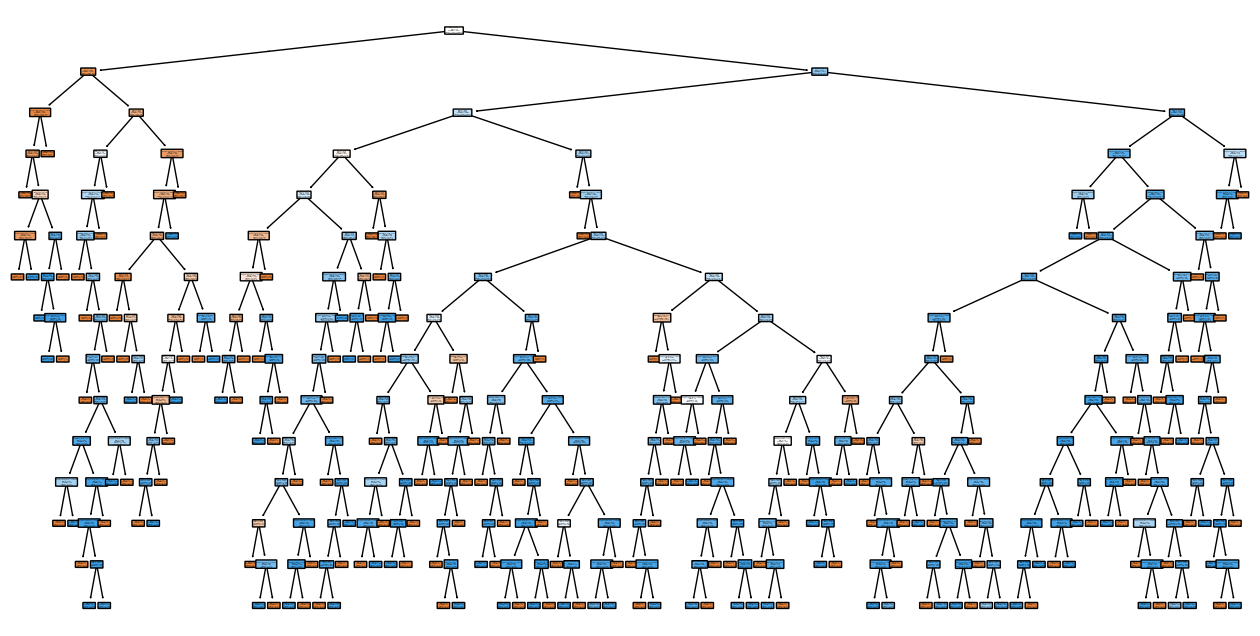

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=['Classe 0', 'Classe 1'], rounded=True)
plt.show()


## **SVM** :

Accuracy: 0.76
F1 Score: 0.76
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       838
           1       0.75      0.80      0.77       850

    accuracy                           0.76      1688
   macro avg       0.76      0.76      0.76      1688
weighted avg       0.76      0.76      0.76      1688



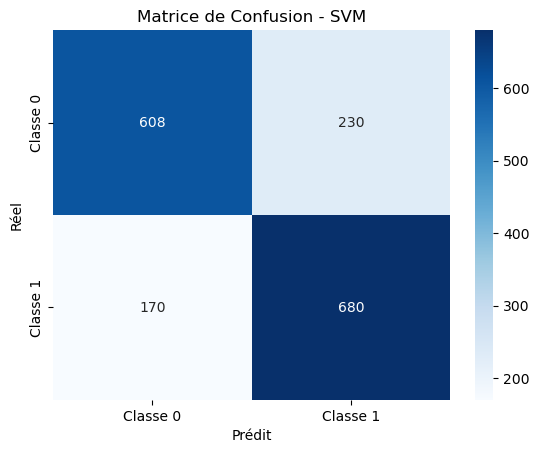

In [38]:
from sklearn.svm import SVC


# Initialisation et entraînement du modèle SVM
svm = SVC(kernel='linear', random_state=42)  # Vous pouvez changer 'linear' par 'rbf', 'poly', etc.
svm.fit(x_train, y_train)

# Prédiction
y_pred_svm = svm.predict(x_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# F1-score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_svm:.2f}")

# Rapport de classification
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - SVM')
plt.show()


- **Validation croisée** :

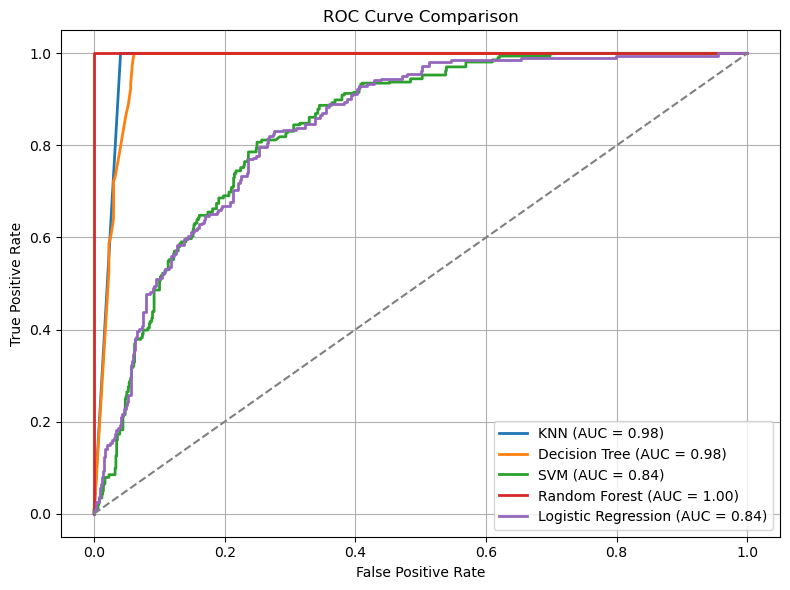

In [39]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=14, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=1500, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=800, C=1.0)
}

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(x_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Comparaison** :

In [40]:
from sklearn.metrics import roc_auc_score
model_dict = {
    "Logistic Regression":model,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}


results = []

for name, model in model_dict.items():
    y_pred = model.predict(x_test)
    
    # Certains modèles comme SVM ma kay3tiwch predict_proba sauf si specified
    try:
        y_proba = model.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Modèle": name,
        "Accuracy": round(acc, 2),
        "F1-score": round(f1, 2),
        "ROC AUC": round(roc, 2) if roc is not None else "N/A"
    })

# Affichage final
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="F1-score", ascending=False))


                Modèle  Accuracy  F1-score ROC AUC
3        Random Forest      1.00      1.00     1.0
2        Decision Tree      0.97      0.97    0.98
1                  KNN      0.93      0.93    0.98
0  Logistic Regression      0.77      0.79    0.84
4                  SVM      0.76      0.77     N/A


## **Enregistrement du modele** :

In [41]:
import pickle
# save the model to disk

with open('rf_healthcare.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [42]:
# load the model from disk
with open('rf_healthcare.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## **Conclusion Finale avant deployement du modele**

- L'analyse des modèles de machine learning pour la prédiction a montré que le modèle Random Forest est le plus performant, avec une précision et un score AUC de **100 %**. Son choix est essentiel pour garantir des prédictions fiables et exploitables.

In [43]:
print(f"Le meilleur résultat du modèle Random Forest est : {accuracy_rf:.2f}")
print(f"Le meilleur score ROC AUC du Random Forest est : {roc_auc2:.2f}")
print(f"Nombre de features utilisés dans l'application : {x_train.shape[1]}")

Le meilleur résultat du modèle Random Forest est : 1.00
Le meilleur score ROC AUC du Random Forest est : 1.00
Nombre de features utilisés dans l'application : 10


❗**Note** :  
- Puisque Random Forest affiche une performance de **100 %**, j'ai fait quelques remarques pour vérifier qu'il ne s'agit pas d'un **overfitting** :  
1. **Accuracy** = 100 %, **F1-score** = 100 %.  
2. Dans la **matrice de confusion**, la classe **0** présente **0 erreurs**, tandis que la classe **1** en compte **8**. Le nombre d'erreurs reste donc très faible.  
3. La courbe **ROC** affiche également **100 %**.  
4. La **moyenne de validation croisée** est de **99,28 %**.  
5. On remarque aussi que les autres **algorithmes** ont obtenu une performance élevée.  


## **Deploiement du model** : 

- **Deploiement with streamlit** : https://github.com/rania0607/streamlit-healthcare